In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit
import math 
from scipy.stats import binom
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')

In [4]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
#df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']

for ix in range(len(df)):
    if df.loc[ix,'trial']<60:
        df.loc[ix,'cont_num']=1
    elif df.loc[ix,'trial']>119:
        df.loc[ix,'cont_num']=3
    else:
        df.loc[ix,'cont_num'] =2

#df['diff_cont'] = df.

#df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())


#df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
# del df['diff_cont']
# df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
obj = ['day', 'session', 'stem']

df['rew_count'] = df.groupby(obj)[['reward']].cumsum()

df[0:60]


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,glob_nom_avg,sess_chng,rew_count
0,0,4,B,1,805020202050,20201028,1,0,1,1.0,True,True,40.0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1.0,False,True,40.0,1,0
2,2,2,A,0,805020202050,20201028,1,2,1,1.0,False,False,40.0,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1.0,False,True,40.0,1,2
4,4,4,B,0,805020202050,20201028,1,4,1,1.0,False,False,40.0,1,2
5,5,5,C,0,805020202050,20201028,1,5,1,1.0,False,True,40.0,1,0
6,6,6,C,1,805020202050,20201028,1,6,1,1.0,False,False,40.0,1,1
7,7,1,A,1,805020202050,20201028,1,7,1,1.0,False,True,40.0,1,1
8,8,2,A,1,805020202050,20201028,1,8,1,1.0,False,False,40.0,1,2
9,9,3,B,0,805020202050,20201028,1,9,1,1.0,False,True,40.0,1,2


In [5]:

df['rew_count'] = df.groupby(obj)[['reward']].cumsum()

df[0:60]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,glob_nom_avg,sess_chng,rew_count
0,0,4,B,1,805020202050,20201028,1,0,1,1.0,True,True,40.0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1.0,False,True,40.0,1,0
2,2,2,A,0,805020202050,20201028,1,2,1,1.0,False,False,40.0,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1.0,False,True,40.0,1,2
4,4,4,B,0,805020202050,20201028,1,4,1,1.0,False,False,40.0,1,2
5,5,5,C,0,805020202050,20201028,1,5,1,1.0,False,True,40.0,1,0
6,6,6,C,1,805020202050,20201028,1,6,1,1.0,False,False,40.0,1,1
7,7,1,A,1,805020202050,20201028,1,7,1,1.0,False,True,40.0,1,1
8,8,2,A,1,805020202050,20201028,1,8,1,1.0,False,False,40.0,1,2
9,9,3,B,0,805020202050,20201028,1,9,1,1.0,False,True,40.0,1,2


In [6]:
df.loc[df.stem == "A", "ChooseA"] = "1"
df.loc[df.stem == "B", "ChooseB"] = "1"
df.loc[df.stem == "C", "ChooseC"] = "1"
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,day_chng,stem_switch,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC
0,0,4,B,1,805020202050,20201028,1,0,1,1.0,True,True,40.0,1,1,0,1,0
1,1,1,A,0,805020202050,20201028,1,1,1,1.0,False,True,40.0,1,0,1,0,0
2,2,2,A,0,805020202050,20201028,1,2,1,1.0,False,False,40.0,1,0,1,0,0
3,3,3,B,1,805020202050,20201028,1,3,1,1.0,False,True,40.0,1,2,0,1,0
4,4,4,B,0,805020202050,20201028,1,4,1,1.0,False,False,40.0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3.0,False,False,45.0,74,28,1,0,0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3.0,False,False,45.0,74,28,1,0,0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3.0,False,False,45.0,74,28,1,0,0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3.0,False,False,45.0,74,29,1,0,0


In [7]:
obj = ['day', 'session', 'stem']
df['rew_rate'] = df.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=5).mean())
df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']

df[170*2:190*2]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C
340,340,4,B,1,205080502020,20201028,2,160,1,3.0,...,40.0,2,31,0,1,0,0.763323,NaN,0.763323,NaN
341,341,3,B,1,205080502020,20201028,2,161,1,3.0,...,40.0,2,32,0,1,0,0.793976,NaN,0.793976,NaN
342,342,4,B,1,205080502020,20201028,2,162,1,3.0,...,40.0,2,33,0,1,0,0.820657,NaN,0.820657,NaN
343,343,3,B,1,205080502020,20201028,2,163,1,3.0,...,40.0,2,34,0,1,0,0.843881,NaN,0.843881,NaN
344,344,4,B,1,205080502020,20201028,2,164,1,3.0,...,40.0,2,35,0,1,0,0.864097,NaN,0.864097,NaN
345,345,3,B,0,205080502020,20201028,2,165,1,3.0,...,40.0,2,35,0,1,0,0.752209,NaN,0.752209,NaN
346,346,4,B,0,205080502020,20201028,2,166,1,3.0,...,40.0,2,35,0,1,0,0.654812,NaN,0.654812,NaN
347,347,3,B,1,205080502020,20201028,2,167,1,3.0,...,40.0,2,36,0,1,0,0.699506,NaN,0.699506,NaN
348,348,4,B,0,205080502020,20201028,2,168,1,3.0,...,40.0,2,36,0,1,0,0.608939,NaN,0.608939,NaN
349,349,3,B,1,205080502020,20201028,2,169,1,3.0,...,40.0,2,37,0,1,0,0.659570,NaN,0.659570,NaN


In [145]:
#all i need i nthis code is his experineced reward rate for now 

#calc reward rate starting at new day, session for each stem
# obj = ['day', 'session', 'stem']
# df['rew_rate'] = df.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=5).mean())
# df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
# df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
# df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']


# cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# # df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# # df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
# # df.loc[(df['trial']==0),'rolling_avg_A'] = 0
# # df.loc[(df['trial']==0),'rolling_avg_B'] = 0
# # df.loc[(df['trial']==0),'rolling_avg_C'] = 0

# df.loc[:,cols] = df.loc[:,cols].ffill()

# equal = (df['rolling_avg_A'] == df['rolling_avg_B']) | (df['rolling_avg_B'] == df['rolling_avg_C']) | (df['rolling_avg_A'] == df['rolling_avg_C'])
# df['best_stem'] = df.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

# df['best_stem2'] = df.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
# df
# replace_index = df.loc[(df['best_stem2'] =='rolling_avg_A')].index
# df.loc[replace_index,'best_stem2'] = 'A'
# replace_index = df.loc[(df['best_stem2'] =='rolling_avg_B')].index
# df.loc[replace_index,'best_stem2'] = 'B'
# replace_index = df.loc[(df['best_stem2'] =='rolling_avg_C')].index
# df.loc[replace_index,'best_stem2'] = 'C'

# replace_index = df.loc[(df['best_stem'] =='rolling_avg_A')].index
# df.loc[replace_index,'best_stem'] = 'A'
# replace_index = df.loc[(df['best_stem'] =='rolling_avg_B')].index
# df.loc[replace_index,'best_stem'] = 'B'
# replace_index = df.loc[(df['best_stem'] =='rolling_avg_C')].index
# df.loc[replace_index,'best_stem'] = 'C'

# df['at_best'] = np.where( df['stem'] == df['best_stem'] , '1', '0')
# df['at_best2'] = np.where( df['stem'] == df['best_stem2'] , '1', '0')
# df['best_all'] = df['at_best'] +df['at_best2']
# # del df['at_best']
# # del df['at_best2']
# Not_at_Best = df[df['best_all']=='00']
# at_best = df[df['best_all']=='01'] 
# at_best2 = df[df['best_all']=='10']

# df.loc[(df['best_all'] =='01'),'best_all']= 1
# df.loc[(df['best_all'] =='10'),'best_all']= 1
# df.loc[(df['best_all'] =='00'),'best_all']= 0

# del df['at_best']
# del df['at_best2']




In [146]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,glob_nom_avg,sess_chng,rew_count,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C
0,0,4,B,1,805020202050,20201028,1,0,1,1.0,...,40.0,1,1,0,1,0,1.000000,NaN,1.000000,NaN
1,1,1,A,0,805020202050,20201028,1,1,1,1.0,...,40.0,1,0,1,0,0,0.000000,0.000000,NaN,NaN
2,2,2,A,0,805020202050,20201028,1,2,1,1.0,...,40.0,1,0,1,0,0,0.000000,0.000000,NaN,NaN
3,3,3,B,1,805020202050,20201028,1,3,1,1.0,...,40.0,1,2,0,1,0,1.000000,NaN,1.000000,NaN
4,4,4,B,0,805020202050,20201028,1,4,1,1.0,...,40.0,1,2,0,1,0,0.619542,NaN,0.619542,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3.0,...,45.0,74,28,1,0,0,0.656759,0.656759,NaN,NaN
13289,13289,1,A,0,508020208020,20201107,6,176,11,3.0,...,45.0,74,28,1,0,0,0.571616,0.571616,NaN,NaN
13290,13290,2,A,0,508020208020,20201107,6,177,11,3.0,...,45.0,74,28,1,0,0,0.497525,0.497525,NaN,NaN
13291,13291,1,A,1,508020208020,20201107,6,178,11,3.0,...,45.0,74,29,1,0,0,0.562643,0.562643,NaN,NaN


In [8]:
#random session is 1st contignecy of some session (up to 74)

random_session = df[df['sess_chng']==50]
random_session = random_session[random_session['cont_num']==1]
random_session

#take only the visits to 1 stem (session 50 is nice because only B visits are in first trial)
first_bout = random_session[random_session.ChooseB=='1']


binom_prep_df = first_bout[['reward','rolling_avg_B', 'rew_count']]
binom_prep_df


# for sesh_bout in range(1, df['sess_chng'].max()):
#     sesh_data = first_bout.loc[only_first_cont['sess_chng'] == sesh_bout] 
#     stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index

,reward,rolling_avg_B,rew_count
8793,1,1.000000,1
8794,0,0.465398,1
8795,1,0.668792,2


In [256]:
binom_prep_df['num_trials']= binom_prep_df['rolling_avg_B'].ne(binom_prep_df['rolling_avg_B'].shift()).cumsum()
#binom_prep_df['num_rew'] = 

<ipython-input-256-539a69b339fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binom_prep_df['num_trials']= binom_prep_df['rolling_avg_B'].ne(binom_prep_df['rolling_avg_B'].shift()).cumsum()


[1.0, 0.46539803861923645, 0.6687917998608345] [0.0, inf, 0.6645279848992202]


<ipython-input-257-be4395d53599>:8: RuntimeWarning: divide by zero encountered in true_divide
  bout_var.append(var/(int(n)^2))


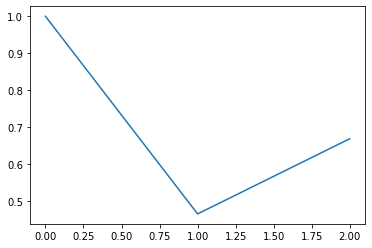

In [257]:
bout_mean=[]
bout_var=[]
for ix in range(len(binom_prep_df)):
    n=  binom_prep_df.iloc[ix]['num_trials']
    p= binom_prep_df.iloc[ix]['rolling_avg_B']
    mean, var = binom.stats(n, p)
    bout_mean.append(mean/n)
    bout_var.append(var/(int(n)^2))
print(bout_mean,bout_var)
plt.plot(bout_mean)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8183995201900272, 0.8497436266120998, 0.7091453060033448, 0.7555972869344533, 0.7934840690608812, 0.824699592551888, 0.8506339228354515, 0.7270742195176975, 0.6231056954653613, 0.6762796682421571, 0.5819644097406913, 0.5016071137165461, 0.5698360904882669] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, inf, 0.38303818693264813, 0.1375054939845115, 0.13190716207981912, 0.245800651811202, 0.2023982444352931, 0.10164468172561814, 0.16235778995216882, 0.29355623467998715, 0.26757558491208727, 0.20852728760216577, 0.21666442822743515, 0.285976740542867]


<ipython-input-254-35070e71d240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binom_prep_df['num_trials']= binom_prep_df['rolling_avg_A'].ne(binom_prep_df['rolling_avg_A'].shift()).cumsum()
<ipython-input-254-35070e71d240>:14: RuntimeWarning: divide by zero encountered in true_divide
  bout_var.append(var/(int(n)^2))


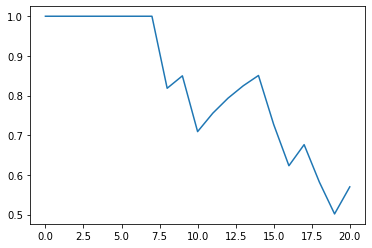

In [254]:

first_bout = random_session[random_session.ChooseA=='1']

binom_prep_df = first_bout[['reward','rolling_avg_A', 'rew_count']]
binom_prep_df
binom_prep_df['num_trials']= binom_prep_df['rolling_avg_A'].ne(binom_prep_df['rolling_avg_A'].shift()).cumsum()

bout_mean=[]
bout_var=[]
for ix in range(len(binom_prep_df)):
    n=  binom_prep_df.iloc[ix]['num_trials']
    p= binom_prep_df.iloc[ix]['rolling_avg_A']
    mean, var = binom.stats(n, p)
    bout_mean.append(mean/n)
    bout_var.append(var/(int(n)^2))
print(bout_mean,bout_var)
plt.plot(bout_mean)

In [150]:
# colors1= ['r','g','b']
# fig, ax = plt.subplots(figsize=(14,7))
# for ix in range(len(binom_prep_df)):
#     n = binom_prep_df.iloc[ix]['num_trials']
#     x=range(int(n))
#     p=binom_prep_df.iloc[ix]['rolling_avg_B']
#     #fig, ax = plt.subplots(figsize=(14,7))
# #ax = sns.distplot(heads, bins=11, label='simulation results')
#     ax.set_xlabel("Number of Heads",fontsize=16)
#     ax.set_ylabel("Frequency",fontsize=16)
#     ax.set_title(f'red=A, blue = C, purple=B')
#     ax.plot(x/n, binom.pmf(x, n, p), 'ro', label='actual binomial distribution')
#     ax.vlines(x/n, 0, binom.pmf(x, n, p), colors=colors1[ix], lw=5, alpha=0.5)

In [246]:
binom_prep_df.iloc[ix]#['num_trials']

reward           1.0
rolling_avg_B    1.0
rew_count        1.0
num_trials       1.0
Name: 8793, dtype: float64

In [151]:
# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
# ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
# ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)


In [159]:
# binom.ppf(2, n, p)

nan

In [154]:
# binom.ppf(0.99, n, p)

3.0

In [157]:
# ax.plot(x, binom.pmf(x, n, p)) #'bo', label='binom pmf')

In [160]:
# p

0.6687917998608344

In [161]:
# n

3.0

In [162]:
# x

array([0., 1., 2.])

In [164]:
# rv = binom(n, p)
# ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
# ax.legend(loc='best', frameon=False)
# plt.show()

In [165]:
# binom(n, p)

NameError: name 'table' is not defined

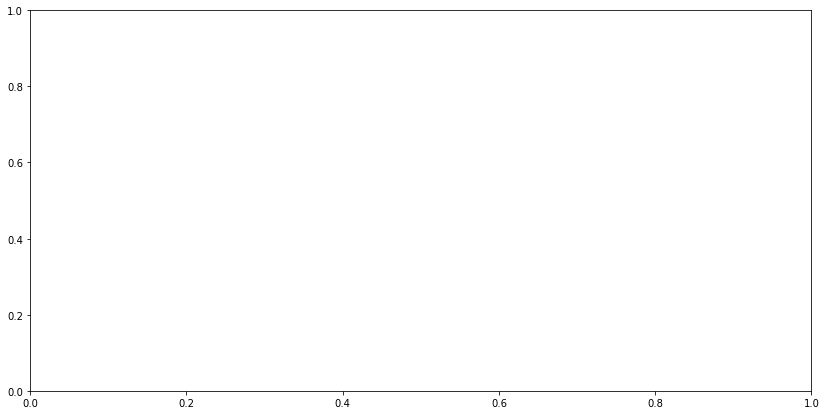

In [183]:
# #stats.binom.pmf(, 7, 1/6)
# colors1= ['r','g','b']
# #fig, ax = plt.subplots(figsize=(14,7))
# for ix in range(len(binom_prep_df)):
#     fig, ax = plt.subplots(figsize=(14,7))
#     n = binom_prep_df.iloc[ix]['num_trials']
#     x= binom_prep_df.iloc[ix]['rew_count']
#     p=binom_prep_df.iloc[ix]['rolling_avg_B']
#     #print(stats.binom.pmf(x, n, p))
# #     print(stats.binom.pmf([(range(int(n)))], n, p))
# #     plt.plot(stats.binom.pmf([(range(int(n)))], n, p))
#     #fig, ax = plt.subplots(figsize=(14,7))
# #ax = sns.distplot(heads, bins=11, label='simulation results')
# #     ax.set_xlabel("Number of Heads",fontsize=16)
# #     ax.set_ylabel("Frequency",fontsize=16)
# #     ax.set_title(f'red=A, blue = C, purple=B')
# #     ax.plot(x/n, binom.pmf(x, n, p), 'ro', label='actual binomial distribution')
# #     ax.vlines(x/n, 0, binom.pmf(x, n, p), colors=colors1[ix], lw=5, alpha=0.5)
#     k = np.arange(n+1)
#     binom_eg = stats.binom.pmf(k, n, p)
#     binom_eg_dist = table().values(k).probability(binom_eg)
#     plt.plot(binom_eg_dist)

<ipython-input-265-580f955e36e5>:14: RuntimeWarning: divide by zero encountered in double_scalars
  dist = [binom.pmf(r, ix, p)/ix for r in r_values ]


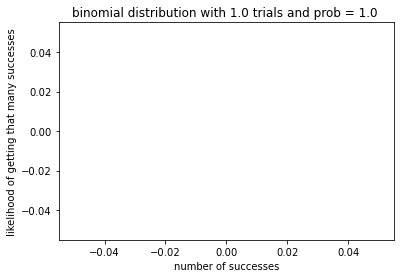

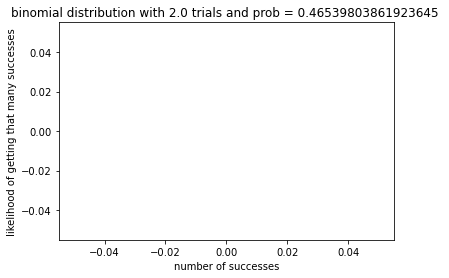

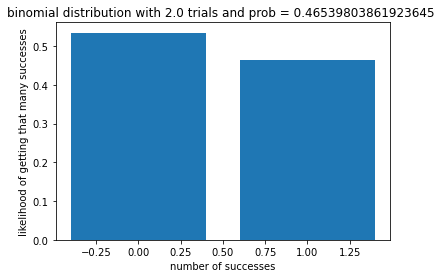

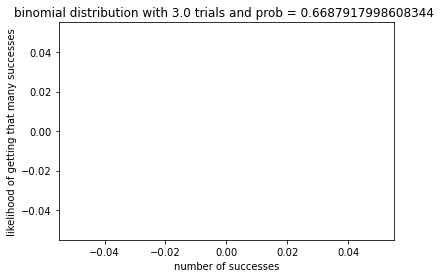

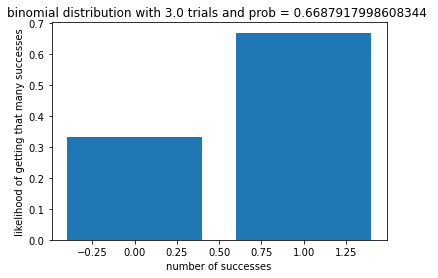

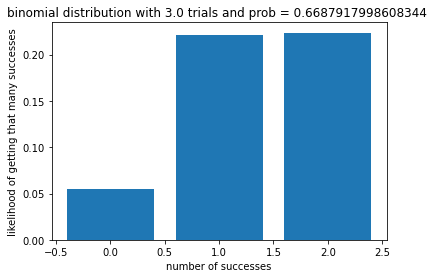

In [265]:
for ix1 in range(3):
    n = binom_prep_df.iloc[ix1]['num_trials']
    x= binom_prep_df.iloc[ix1]['rew_count']
    p=binom_prep_df.iloc[ix1]['rolling_avg_B']
#p1=.2
    n1=range(int(n))
# defining the list of r values
#r_values = list(range(n + 1))
# obtaining the mean and variance 
# list of pmf values
    for ix in n1:
        r_values = list(range(ix + 1))
        mean, var = binom.stats(ix, p)
        dist = [binom.pmf(r, ix, p)/ix for r in r_values ]
        plt.bar(r_values, dist)
#     mean, var = binom.stats(ix, p1)
#     dist1 = [binom.pmf(r, ix, p1) for r in r_values ]
#     plt.bar(r_values, dist1)
        plt.title(f'binomial distribution with {n} trials and prob = {p} ')
        plt.xlabel('number of successes')
        plt.ylabel('likelihood of getting that many successes')
        plt.show()

In [229]:
from numpy import random
ix=len(binom_prep_df)-1
n = binom_prep_df.iloc[ix]['num_trials']
#x= binom_prep_df.iloc[ix]['rew_count']
p=binom_prep_df.iloc[ix]['rolling_avg_A']
x = random.binomial(n, p, size=100)

sns.distplot(x/n, hist=True, kde=False)

KeyError: 'rolling_avg_A'

<AxesSubplot:>

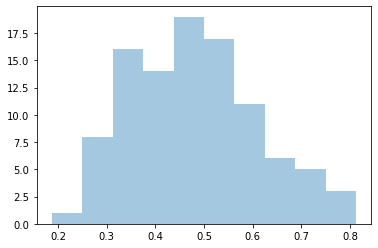

In [228]:
from numpy import random
ix=len(binom_prep_df)-1
n = binom_prep_df.iloc[ix]['num_trials']
#x= binom_prep_df.iloc[ix]['rew_count']
p=binom_prep_df.iloc[ix]['rolling_avg_B']
x = random.binomial(n, p, size=100)

sns.distplot(x/n, hist=True, kde=False)

In [266]:
n

3.0

In [267]:
p

0.6687917998608344

In [232]:
mean, var = binom.stats(n, p)

In [233]:
mean

array(6.76514487)

In [234]:
var

array(3.9046958)

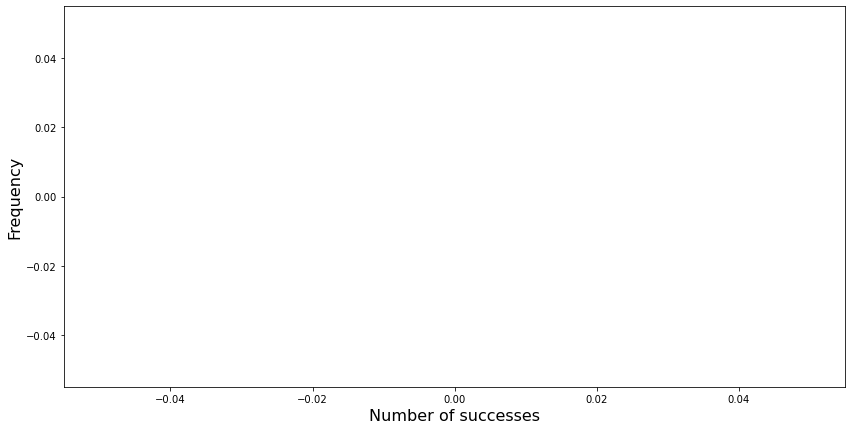

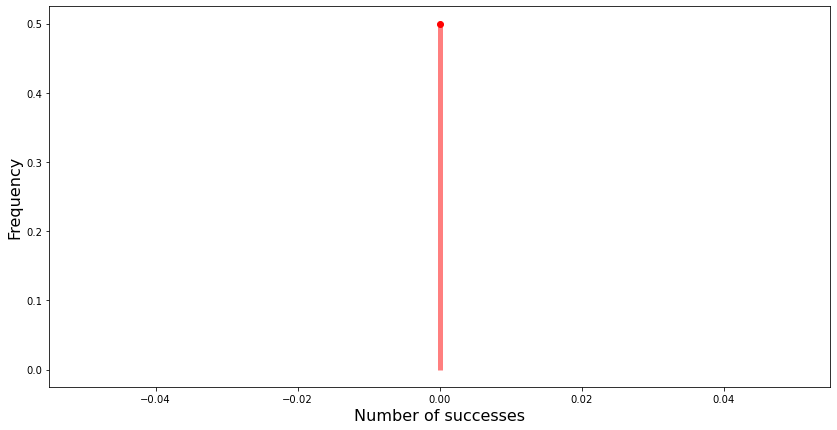

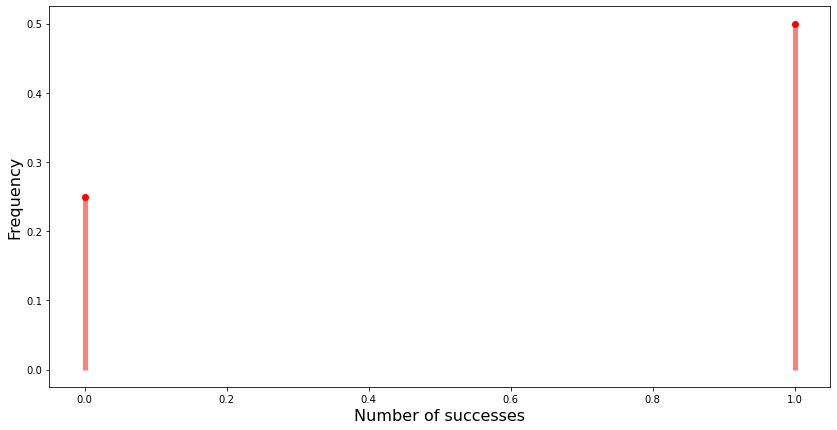

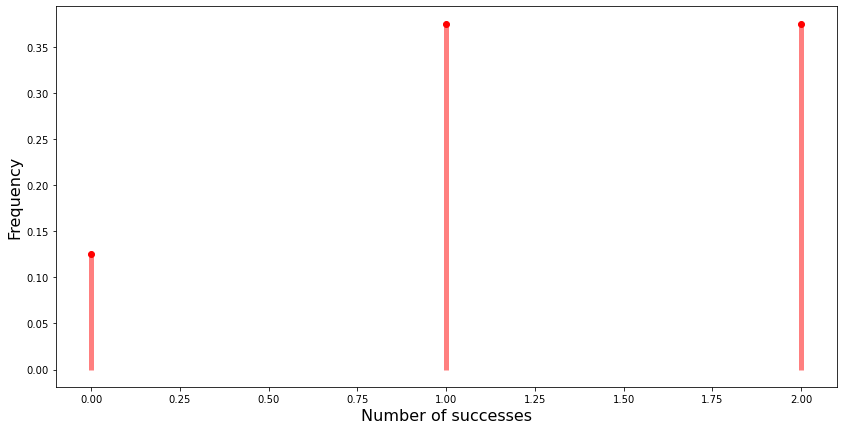

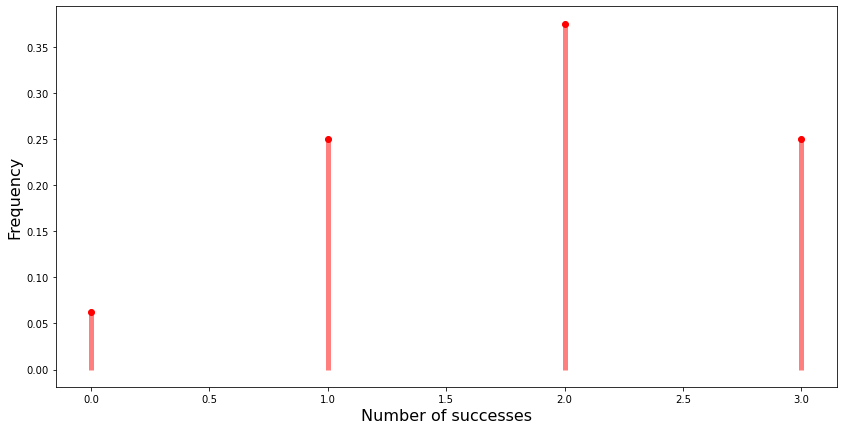

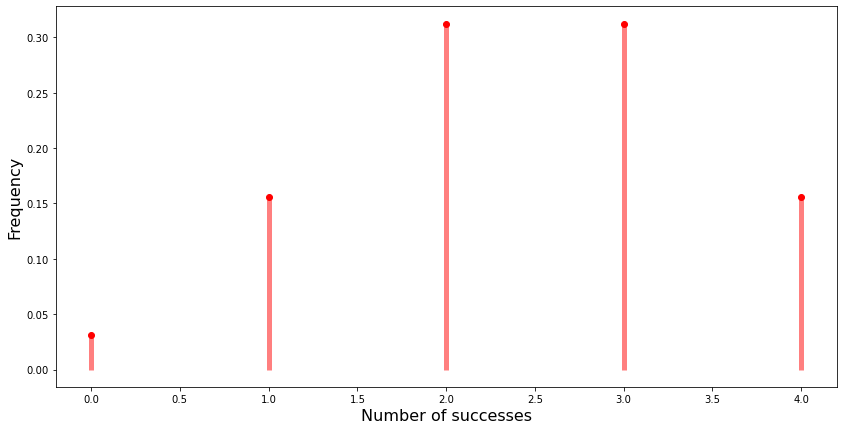

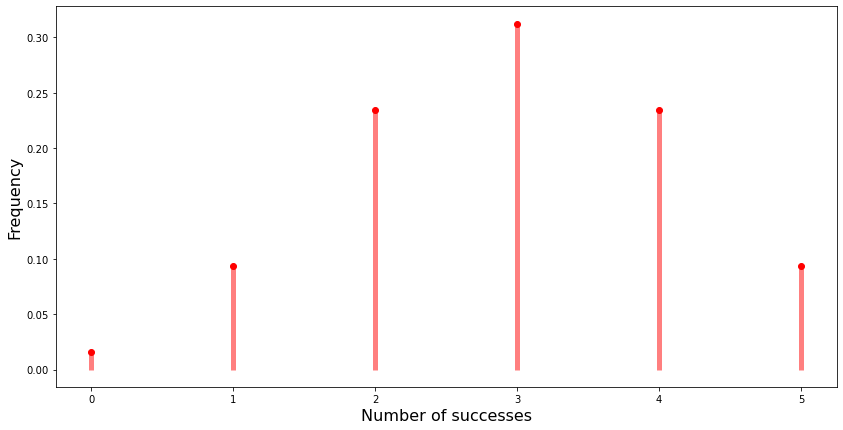

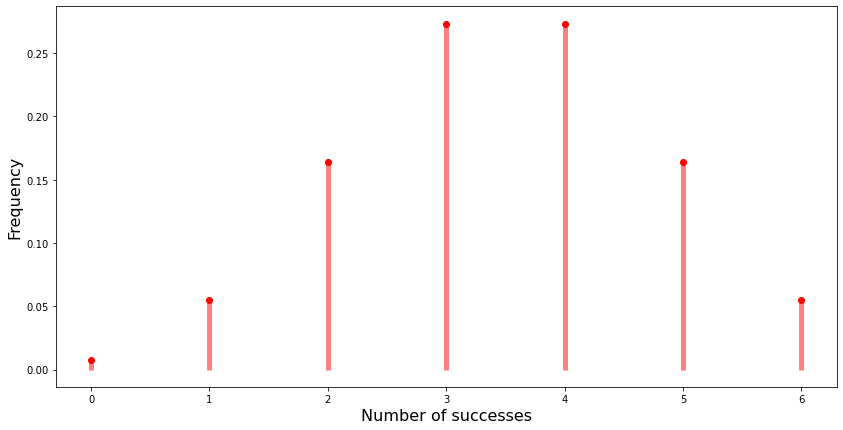

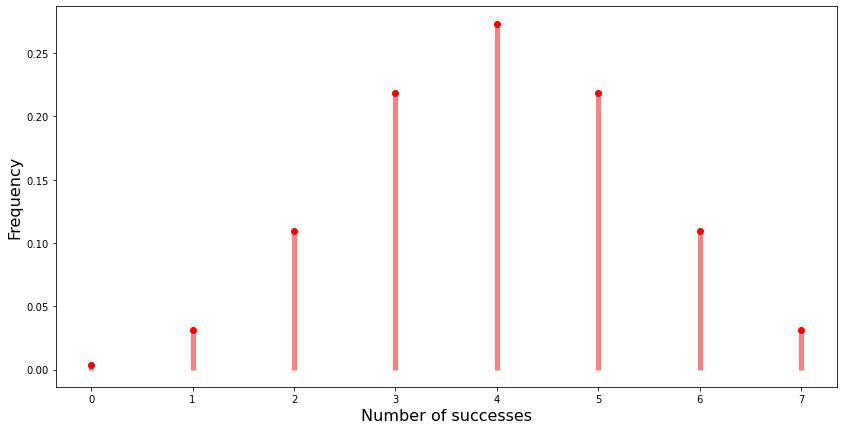

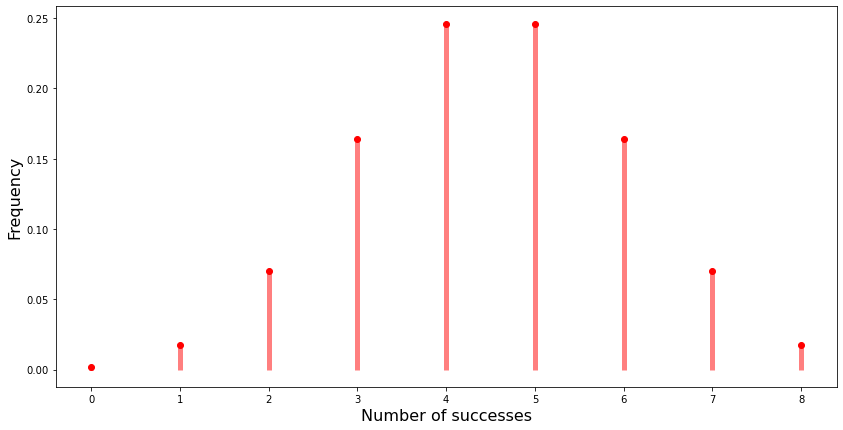

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input variables
# Number of trials
trials = 1000
# Number of independent experiments in each trial
for ix in range(10):
# Probability of success for each experiment
    p = 0.5
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
# def run_binom(trials, n, p):
#     heads = []
#     for i in range(trials):
#         tosses = [np.random.random() for i in range(n)]
#         heads.append(len([i for i in tosses if i>=0.50]))
#     return heads
# # Run the function
# heads = run_binom(trials, n, p)
# # Plot the results as a histogram
    fig, ax = plt.subplots(figsize=(14,7))
#ax = sns.distplot(heads, bins=11, label='simulation results')
    ax.set_xlabel("Number of successes",fontsize=16)
    ax.set_ylabel("Frequency",fontsize=16)
    from scipy.stats import binom
    x = range(0,ix)
    ax.plot(x, binom.pmf(x, ix, p), 'ro', label='actual binomial distribution')
    ax.vlines(x, 0, binom.pmf(x, ix, p), colors='r', lw=5, alpha=0.5)
#plt.legend()
    plt.show()

In [40]:
binom.pmf(10, 11, p)

6.716849298982194e-05

In [10]:
pretend = [0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0]
lst_prob=[]
for trial_num in range(len(pretend)):
    if ix==0:
         p=pretend[trial_num]
    else:
        p=statistics.mean(pretend[0:trial_num+1])
    lst_prob.append(p)


In [303]:
lst_prob

[0,
 0.5,
 0.6666666666666666,
 0.75,
 0.6,
 0.6666666666666666,
 0.7142857142857143,
 0.625,
 0.6666666666666666,
 0.7,
 0.6363636363636364,
 0.5833333333333334,
 0.5384615384615384,
 0.5,
 0.5333333333333333,
 0.5]

In [292]:
pretend[0:ix+1]

[0, 1, 1, 1]

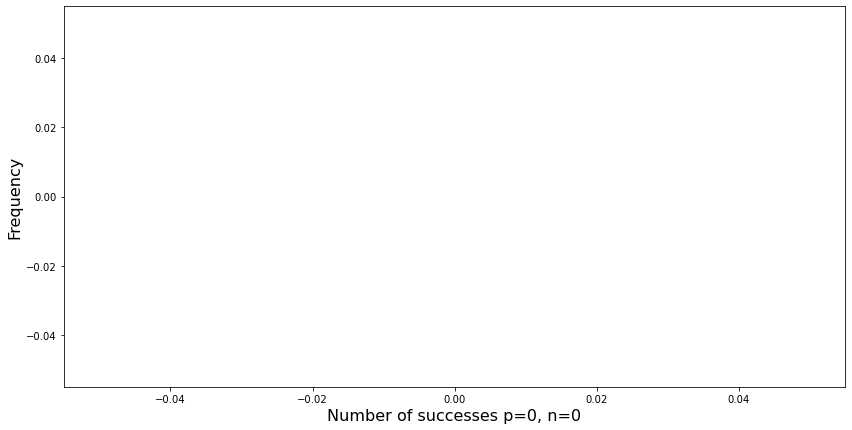

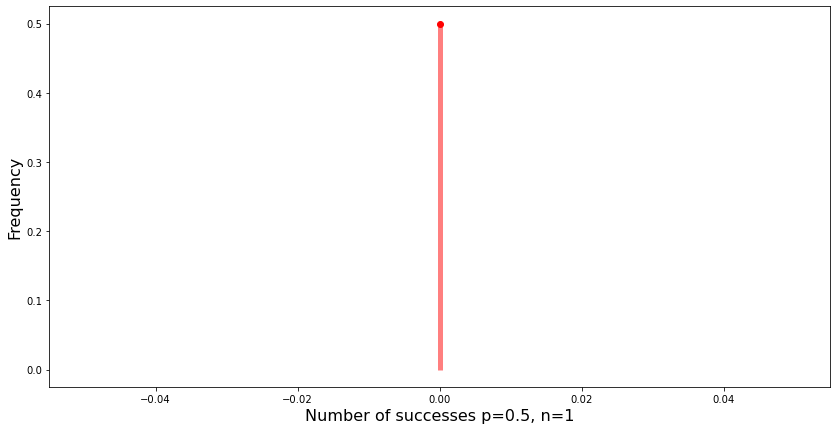

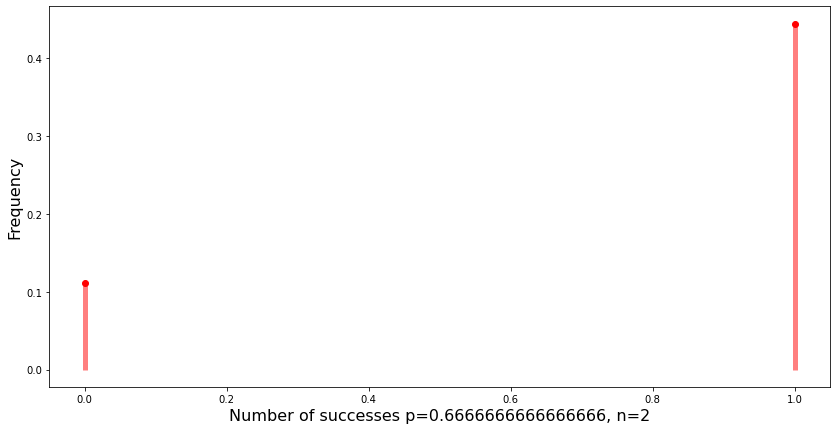

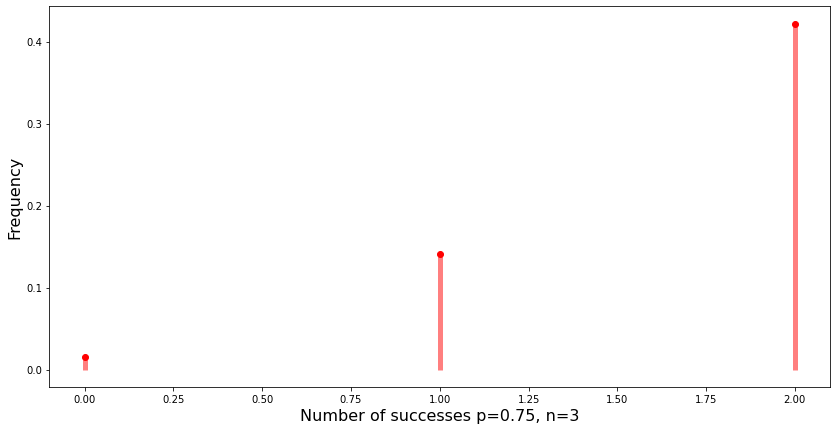

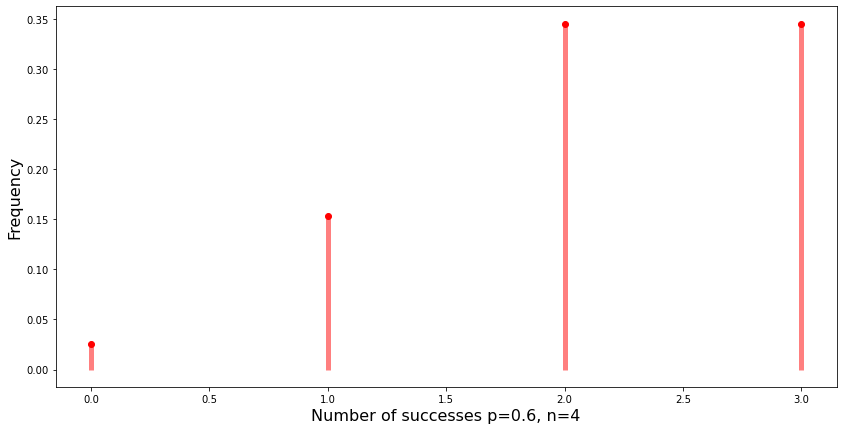

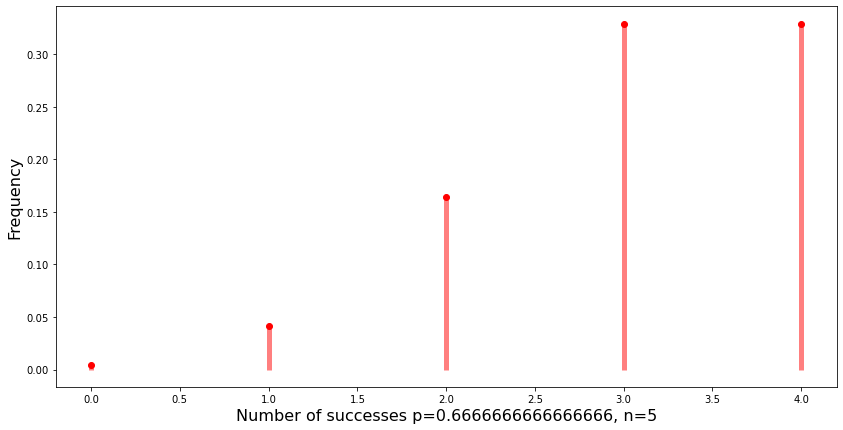

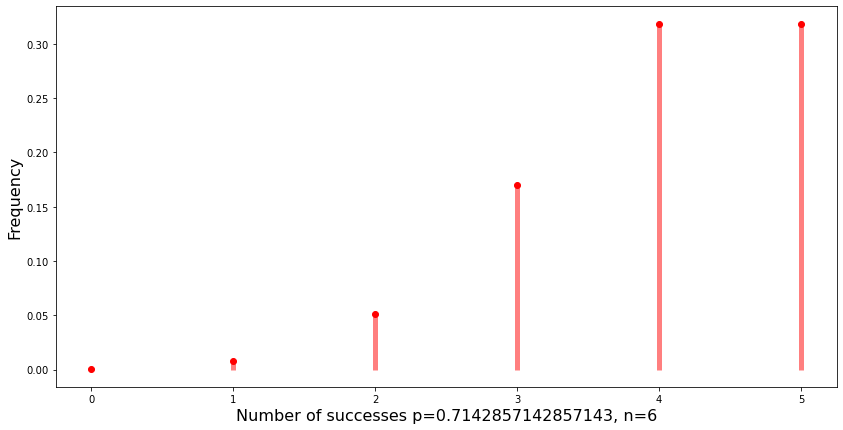

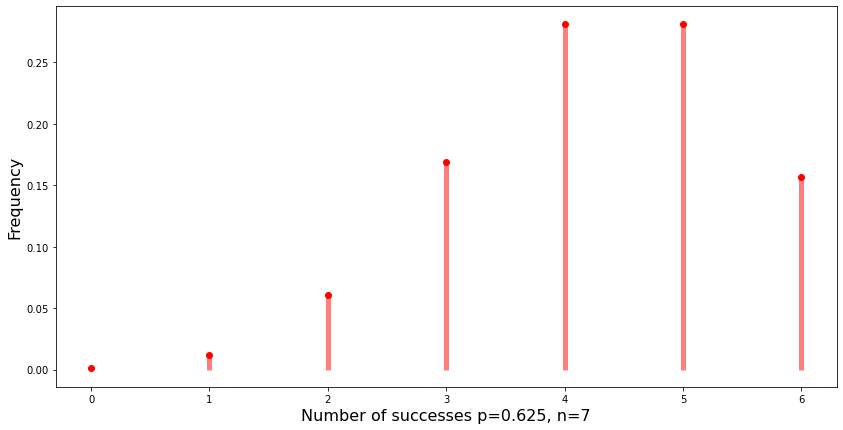

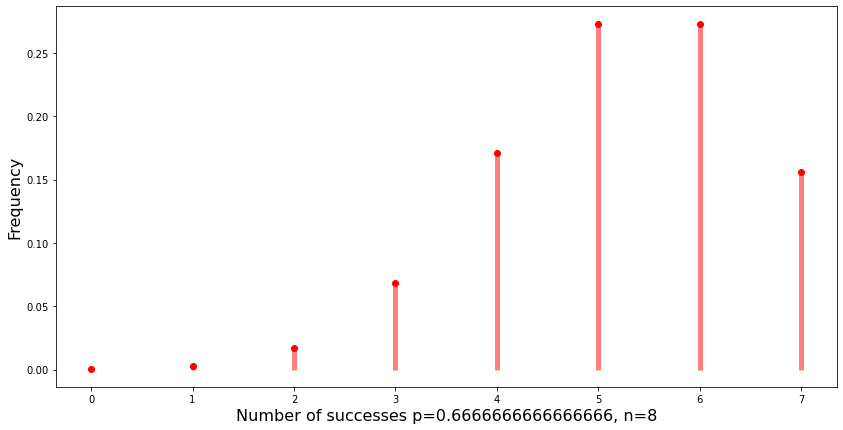

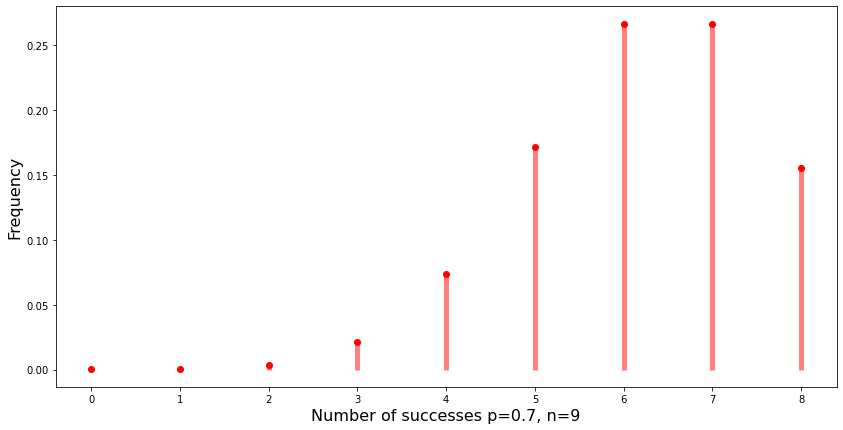

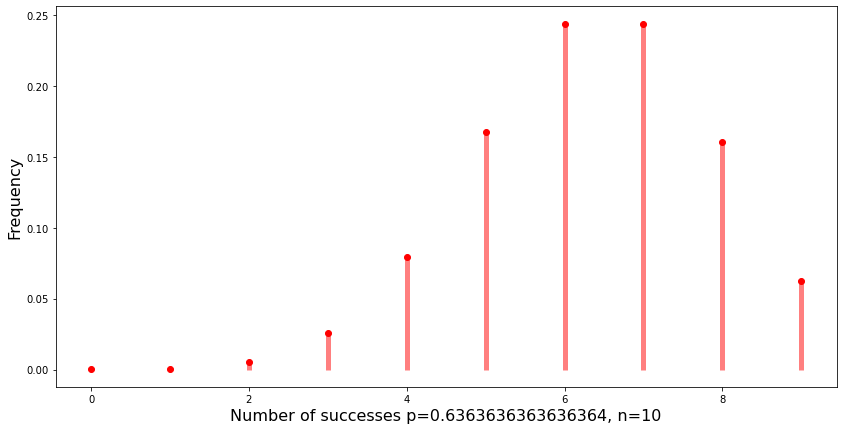

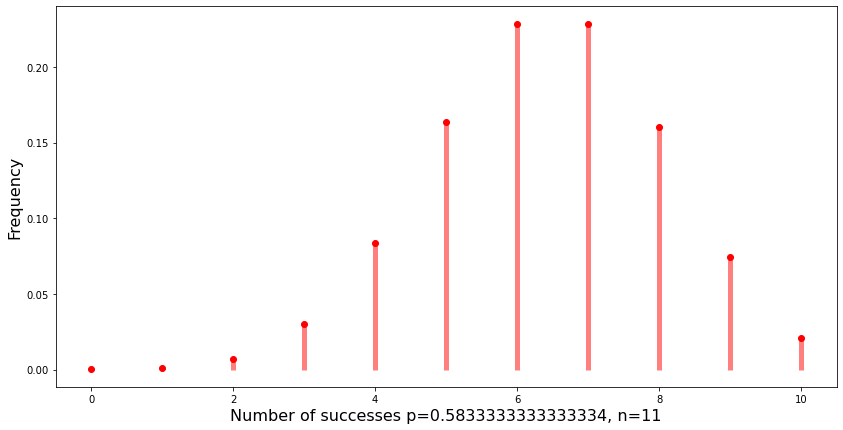

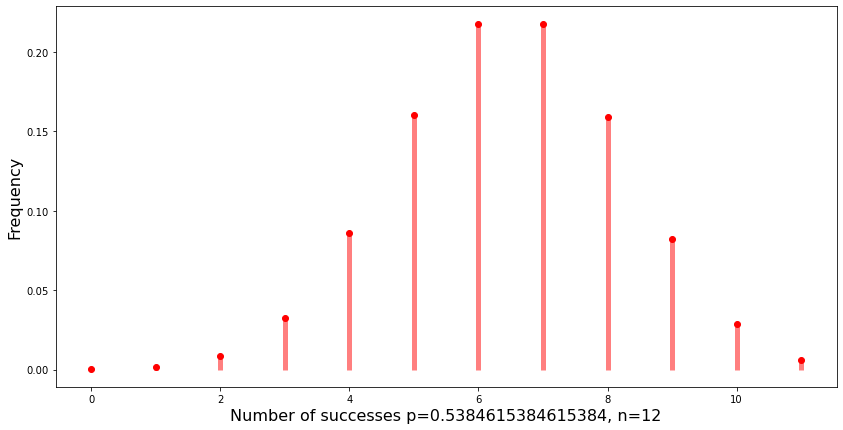

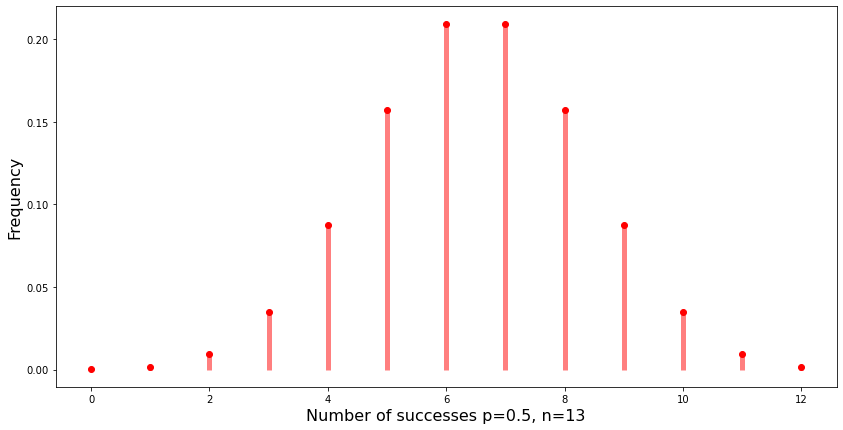

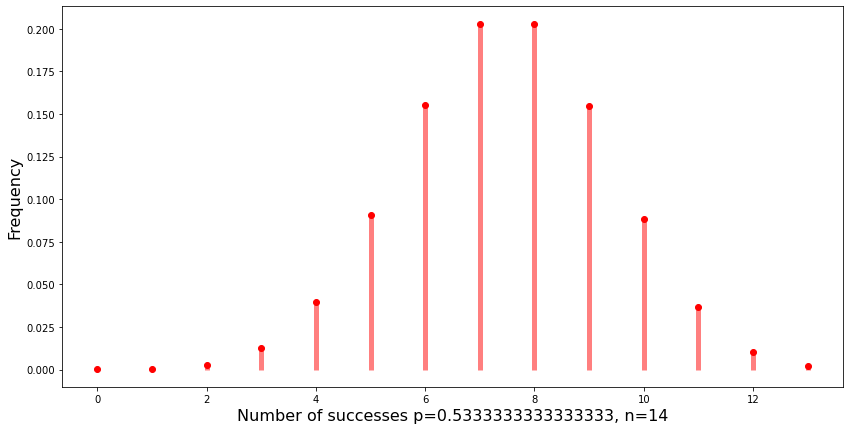

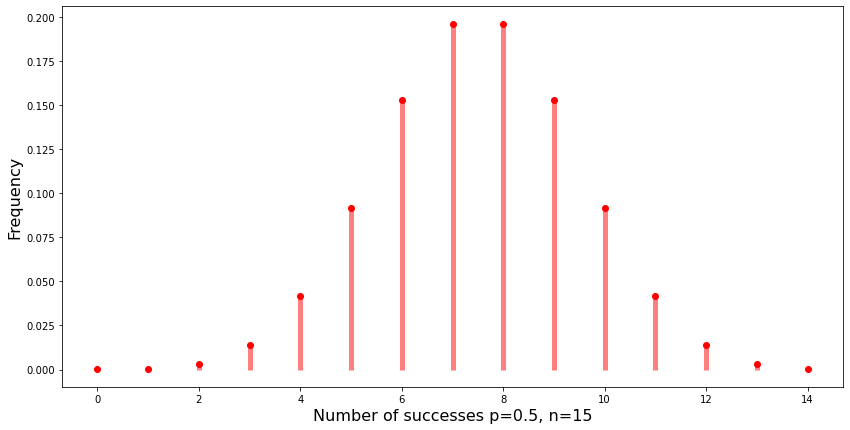

In [15]:
# Number of independent experiments in each trial
for ix in range(len(lst_prob)):
# Probability of success for each experiment
    p = lst_prob[ix]
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
# def run_binom(trials, n, p):
#     heads = []
#     for i in range(trials):
#         tosses = [np.random.random() for i in range(n)]
#         heads.append(len([i for i in tosses if i>=0.50]))
#     return heads
# # Run the function
# heads = run_binom(trials, n, p)
# # Plot the results as a histogram
    fig, ax = plt.subplots(figsize=(14,7))
#ax = sns.distplot(heads, bins=11, label='simulation results')
    ax.set_xlabel(f"Number of successes p={p}, n={ix}",fontsize=16)
    ax.set_ylabel("Frequency",fontsize=16)
    from scipy.stats import binom
    x = range(0,ix)
#     for ix1 in x
#         x1 = x[ix1]
    ax.plot(x, binom.pmf(x, ix, p), 'ro', label='actual binomial distribution')
    ax.vlines(x, 0, binom.pmf(x, ix, p), colors='r', lw=5, alpha=0.5)
#plt.legend()
    plt.show()

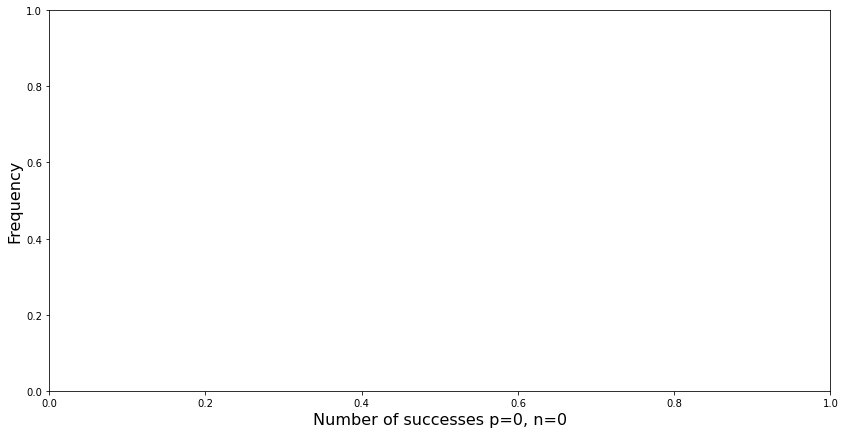

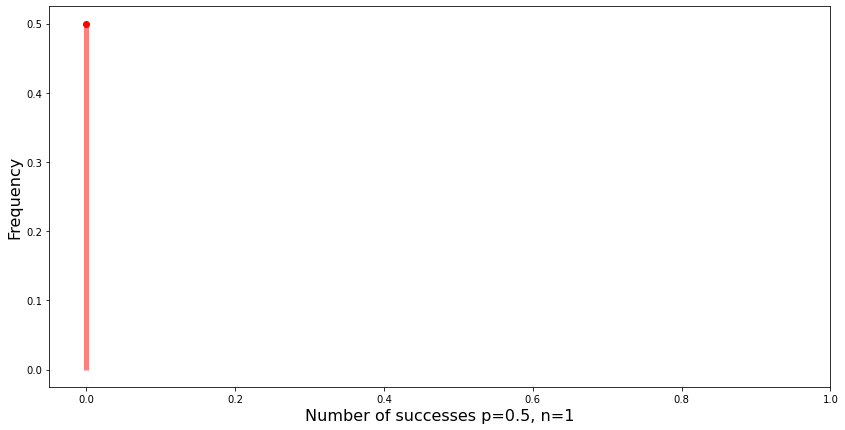

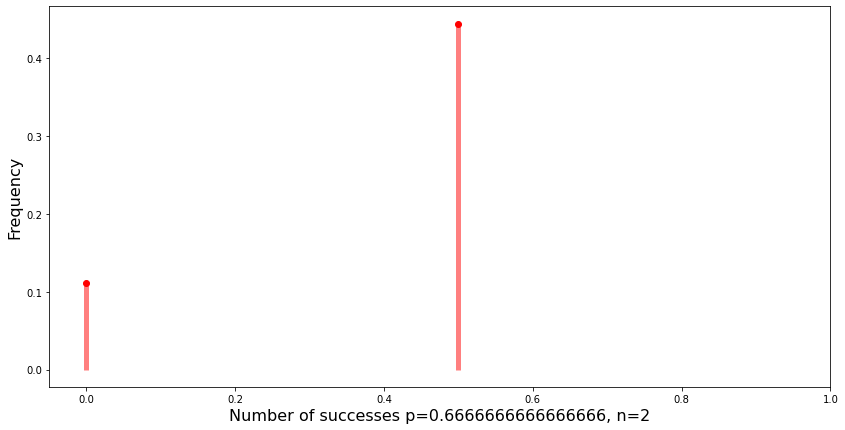

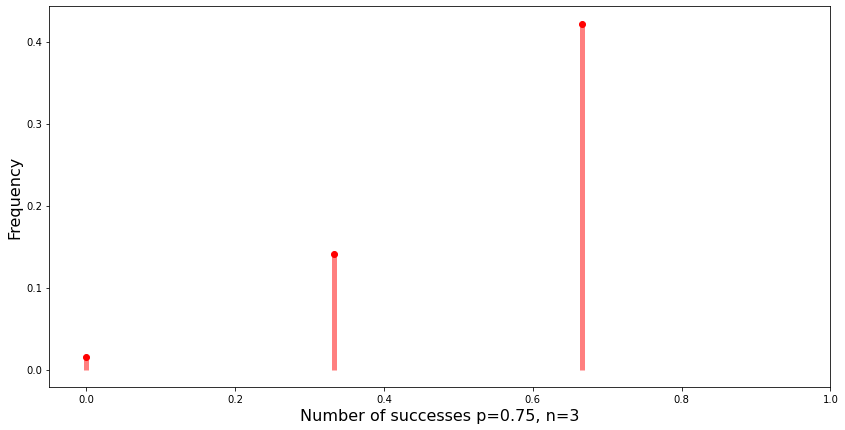

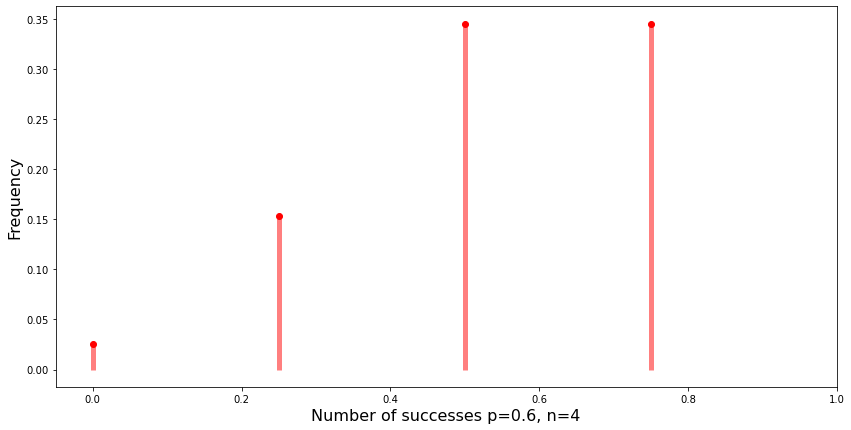

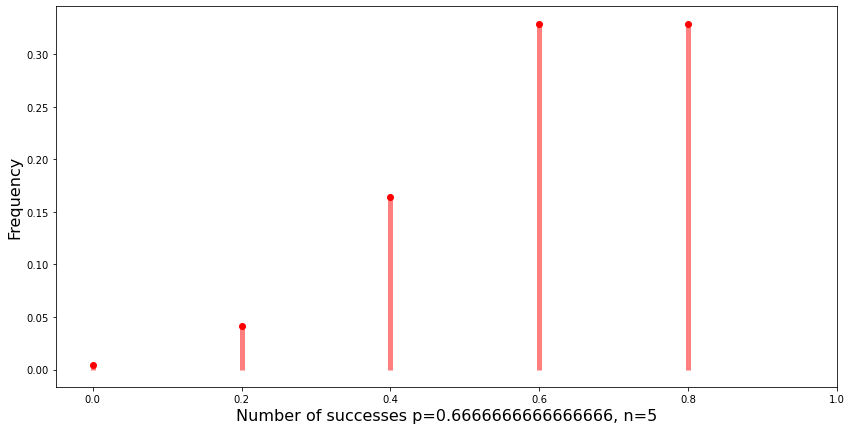

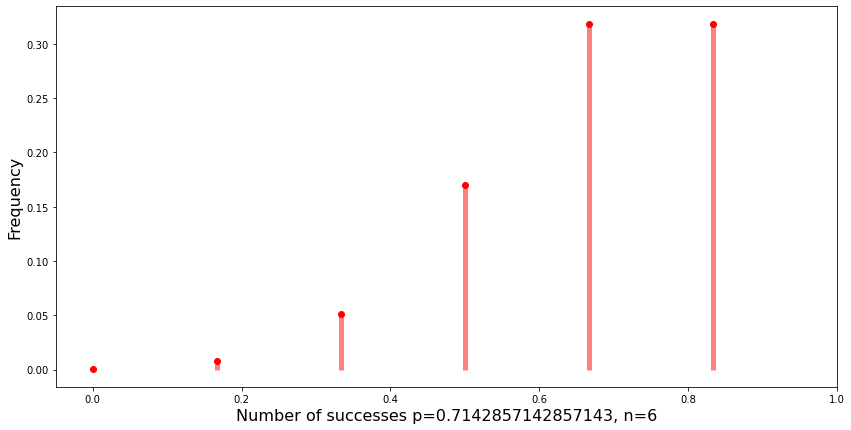

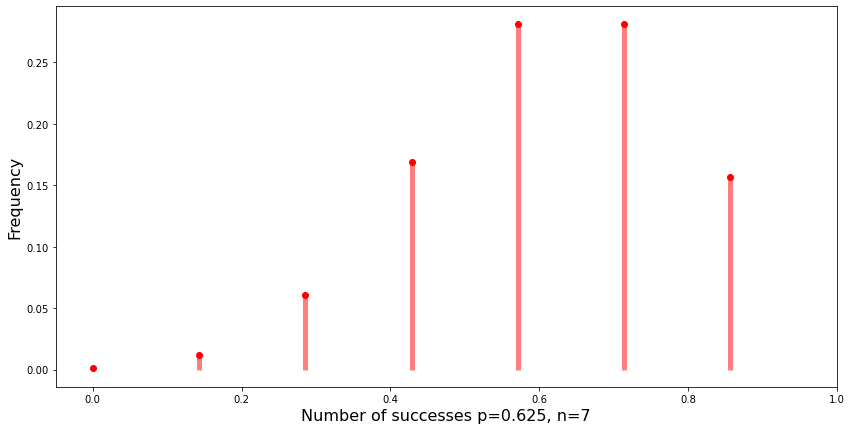

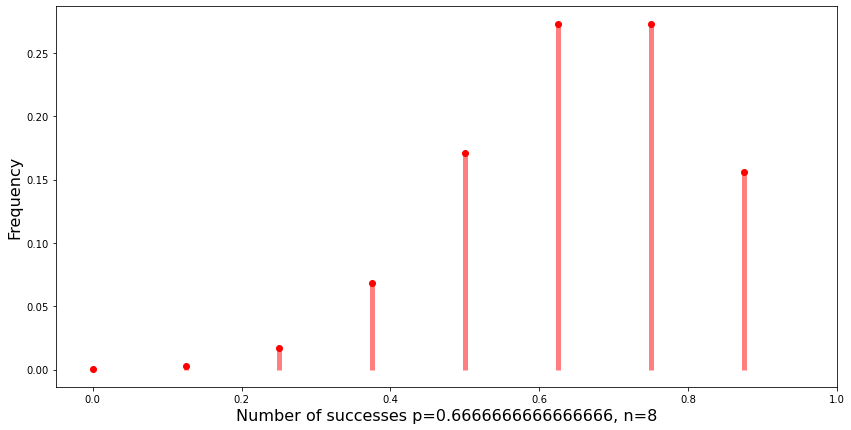

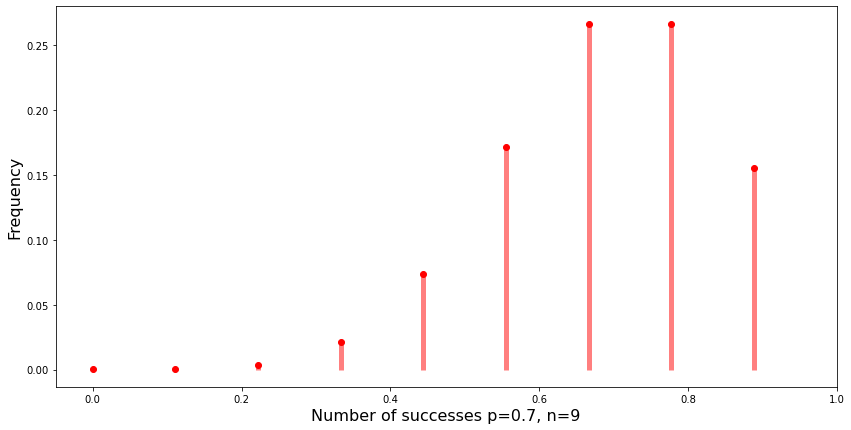

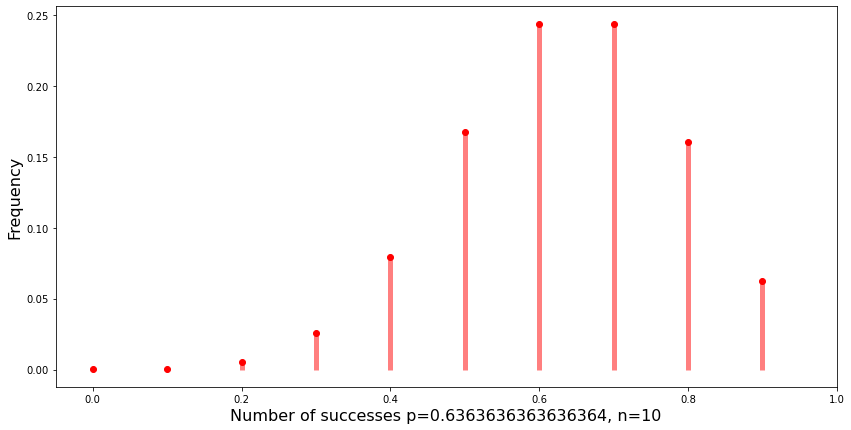

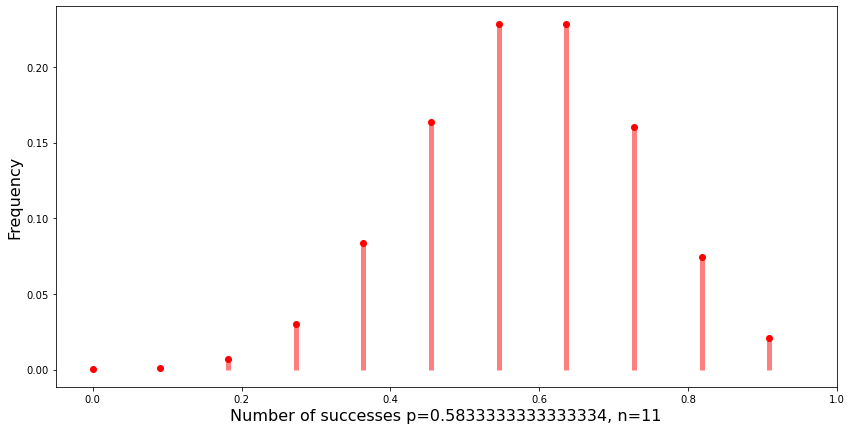

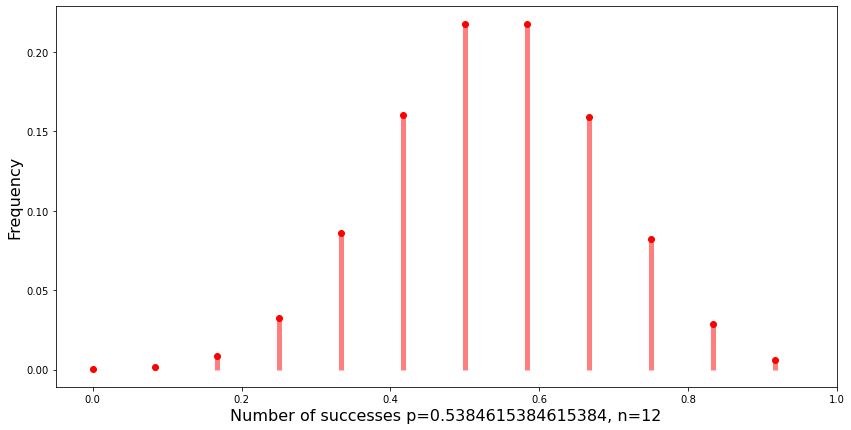

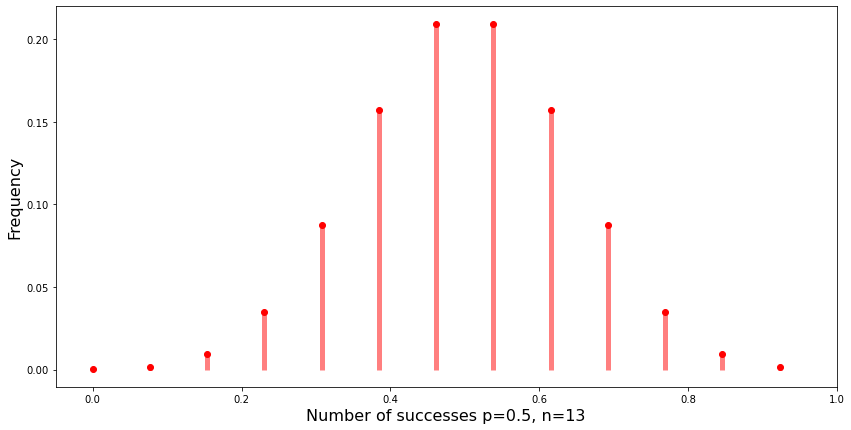

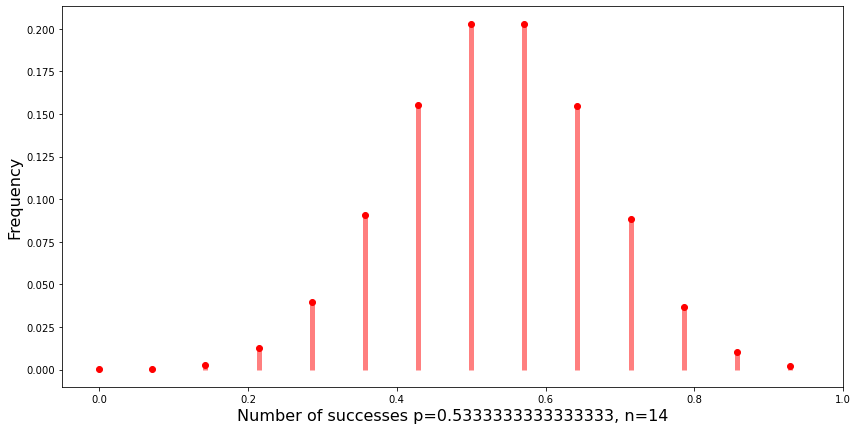

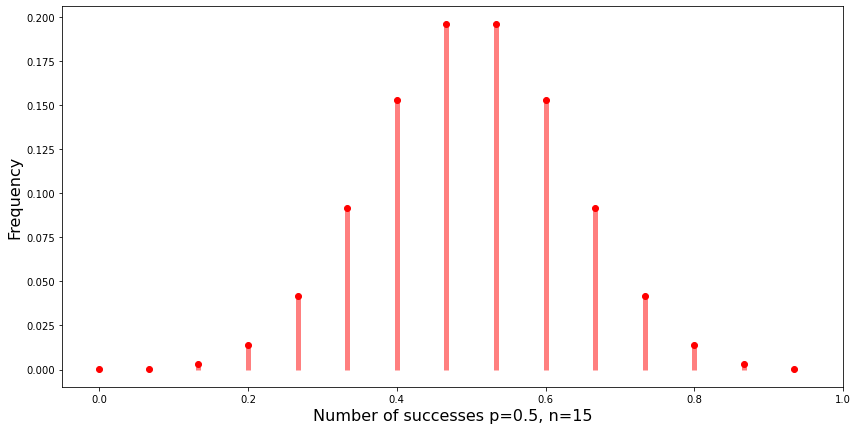

In [17]:
# Number of independent experiments in each trial
#proportion!
for ix in range(len(lst_prob)):
# Probability of success for each experiment
    p = lst_prob[ix]
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
# def run_binom(trials, n, p):
#     heads = []
#     for i in range(trials):
#         tosses = [np.random.random() for i in range(n)]
#         heads.append(len([i for i in tosses if i>=0.50]))
#     return heads
# # Run the function
# heads = run_binom(trials, n, p)
# # Plot the results as a histogram
    fig, ax = plt.subplots(figsize=(14,7))
#ax = sns.distplot(heads, bins=11, label='simulation results')
    ax.set_xlabel(f"Number of successes p={p}, n={ix}",fontsize=16)
    ax.set_ylabel("Frequency",fontsize=16)
    from scipy.stats import binom
    x = range(0,ix)
    for ix1 in x:
        ax.plot(ix1/ix, binom.pmf(ix1, ix, p), 'ro', label='actual binomial distribution')
        ax.vlines(ix1/ix, 0, binom.pmf(ix1, ix, p), colors='r', lw=5, alpha=0.5)
        plt.xlim([-.05,1])
#plt.legend()
    plt.show()

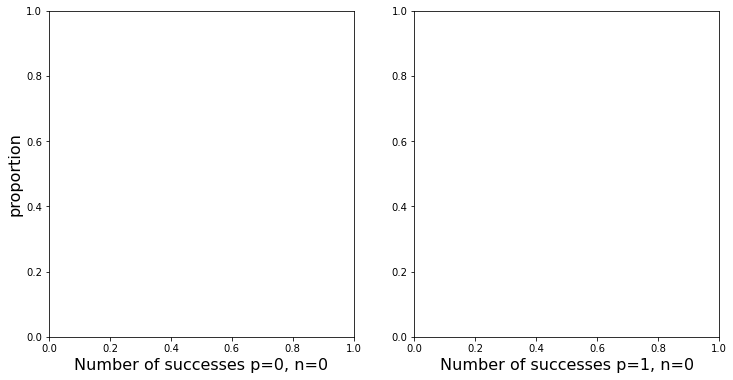

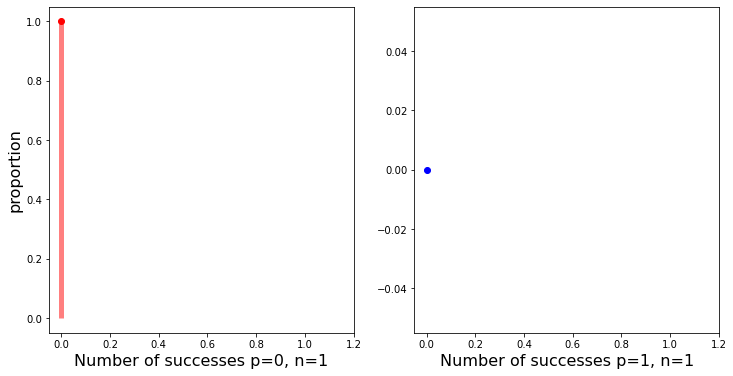

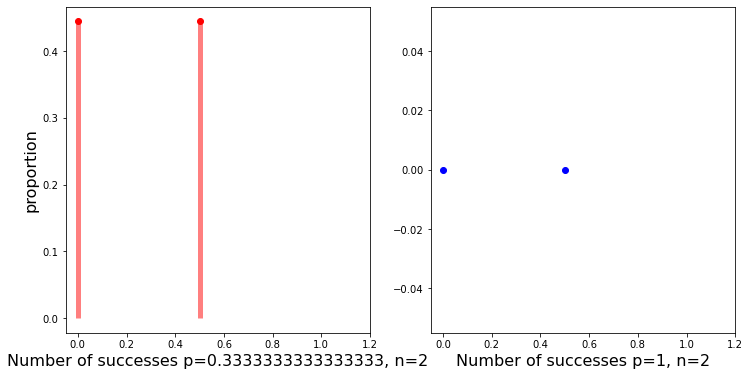

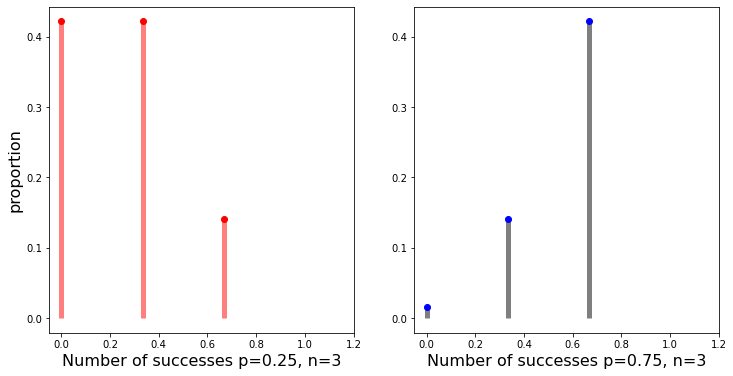

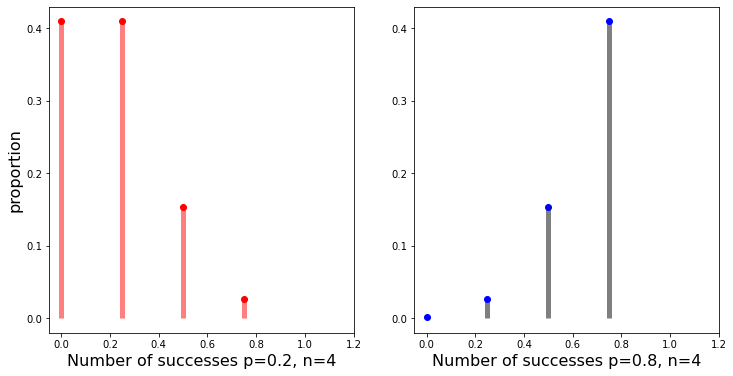

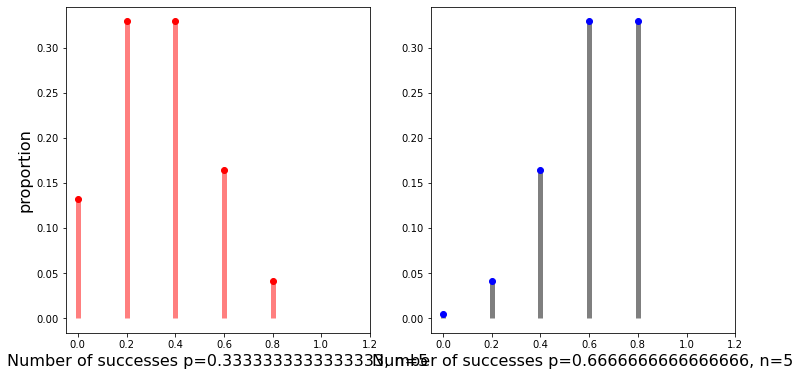

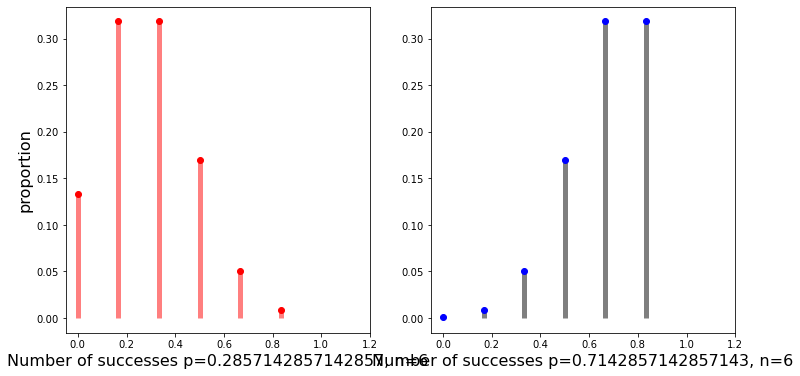

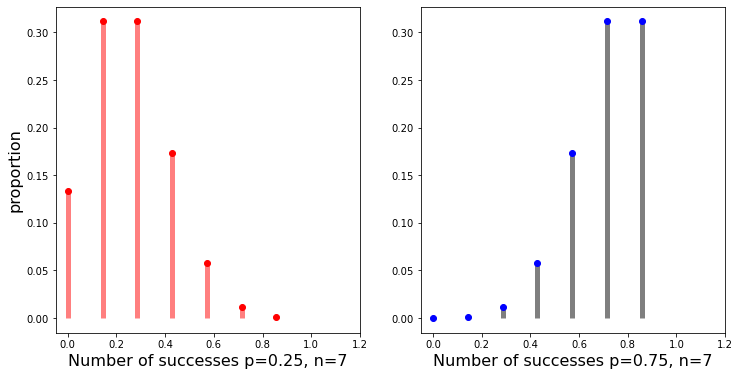

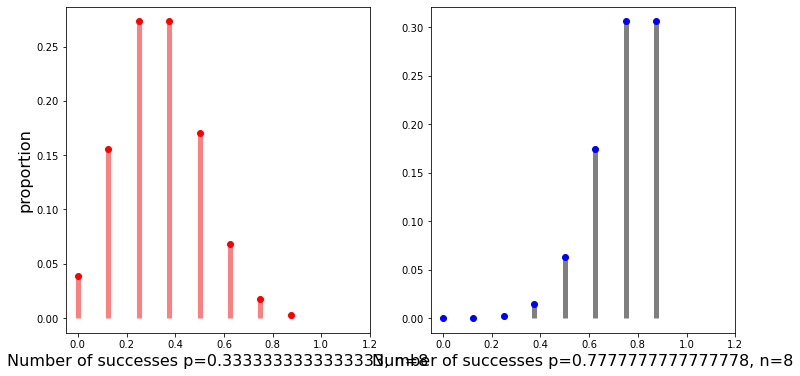

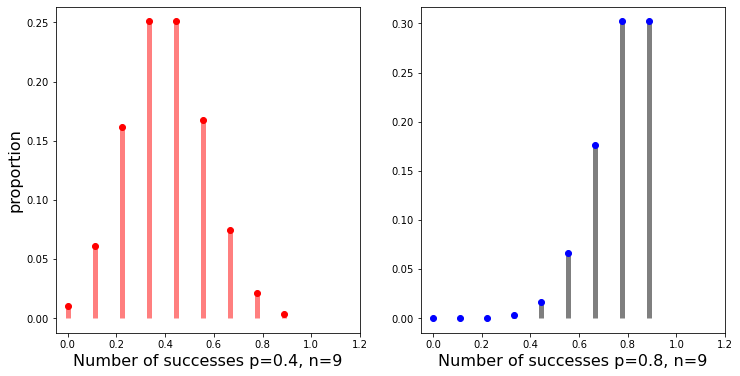

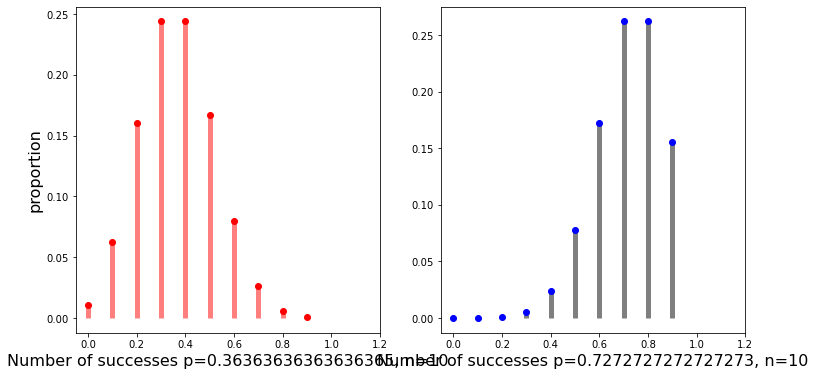

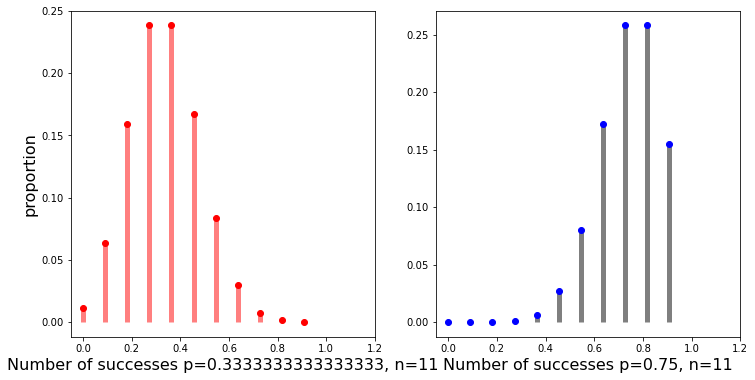

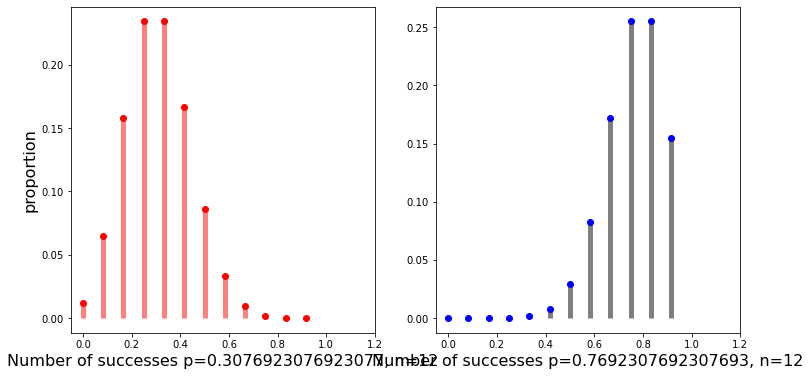

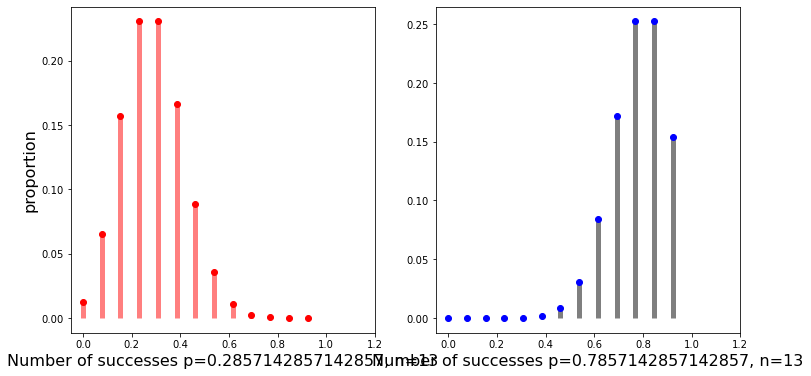

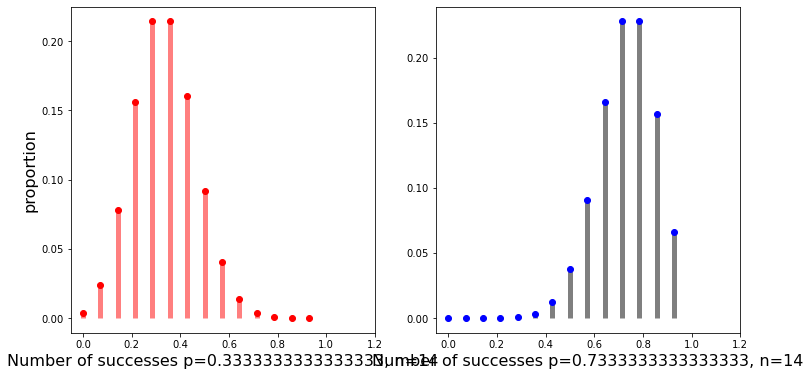

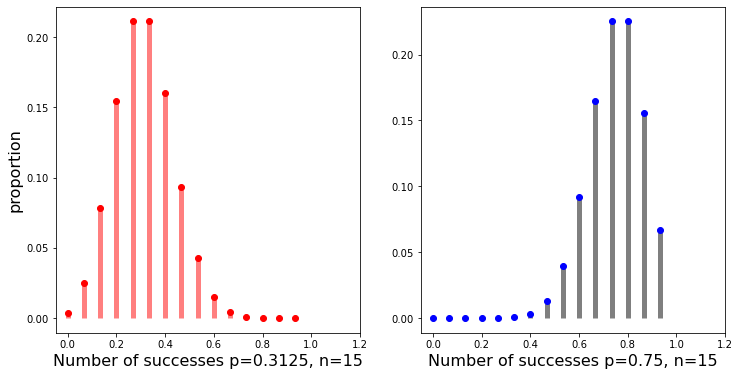

In [44]:
pretend = [0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0]
lst_prob=[]
for trial_num in range(len(pretend)):
    if ix==0:
         p=pretend[trial_num]
    else:
        p=statistics.mean(pretend[0:trial_num+1])
    lst_prob.append(p)


pretend2 = [1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1]
lst_prob2=[]
for trial_num in range(len(pretend2)):
    if ix==0:
         p2=pretend2[trial_num]
    else:
        p2=statistics.mean(pretend2[0:trial_num+1])
    lst_prob2.append(p2)


# Number of independent experiments in each trial
#proportion!
#2 experiments!
for ix in range(len(lst_prob)):
# Probability of success for each experiment
    p = lst_prob[ix]
    p2= lst_prob2[ix]
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
# def run_binom(trials, n, p):
#     heads = []
#     for i in range(trials):
#         tosses = [np.random.random() for i in range(n)]
#         heads.append(len([i for i in tosses if i>=0.50]))
#     return heads
# # Run the function
# heads = run_binom(trials, n, p)
# # Plot the results as a histogram
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
#ax = sns.distplot(heads, bins=11, label='simulation results')
    ax.set_xlabel(f"Number of successes p={p}, n={ix}",fontsize=16)
    ax2.set_xlabel(f"Number of successes p={p2}, n={ix}",fontsize=16)


    ax.set_ylabel("proportion",fontsize=16)
    from scipy.stats import binom
    x = range(0,ix)
    for ix1 in x:
        ax.plot(ix1/ix, binom.pmf(ix1, ix, p),'ro', label='actual binomial distribution')
        ax2.plot(ix1/ix, binom.pmf(ix1, ix, p2),'bo', label='actual binomial distribution')
        ax.vlines(ix1/ix, 0, binom.pmf(ix1, ix, p), colors='r', lw=5, alpha=0.5)
        ax2.vlines(ix1/ix, 0, binom.pmf(ix1, ix, p2), colors='black', lw=5, alpha=0.5)
        ax.set_xlim([-.05,1.2])
        ax2.set_xlim([-.05,1.2])
#plt.legend()
    plt.show()
#opacity 

In [20]:
pretend = [0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0]
lst_prob=[]
for trial_num in range(len(pretend)):
    if ix==0:
         p=pretend[trial_num]
    else:
        p=statistics.mean(pretend[0:trial_num+1])
    lst_prob.append(p)


pretend2 = [1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1]
lst_prob2=[]
for trial_num in range(len(pretend2)):
    if ix==0:
         p2=pretend2[trial_num]
    else:
        p2=statistics.mean(pretend2[0:trial_num+1])
    lst_prob2.append(p2)


# Number of independent experiments in each trial
#proportion!
#2 experiments!
for ix in range(len(lst_prob)):
# Probability of success for each experiment
    p = lst_prob[ix]
    p2= lst_prob2[ix]
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
# def run_binom(trials, n, p):
#     heads = []
#     for i in range(trials):
#         tosses = [np.random.random() for i in range(n)]
#         heads.append(len([i for i in tosses if i>=0.50]))
#     return heads
# # Run the function
# heads = run_binom(trials, n, p)
# # Plot the results as a histogram
    fig ,ax = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
#ax = sns.distplot(heads, bins=11, label='simulation results')
    ax.set_xlabel(f"Number of successes p={p}, n={ix}",fontsize=16)
    #ax2.set_xlabel(f"Number of successes p={p2}, n={ix}",fontsize=16)


    ax.set_ylabel("proportion",fontsize=16)
    from scipy.stats import binom
    x = range(0,ix)
    for ix1 in x:
        ax.plot(ix1/ix, binom.pmf(ix1, ix, p), color='red', label='actual binomial distribution')
        ax2.plot(ix1/ix, binom.pmf(ix1, ix, p2), color='black', label='actual binomial distribution')
        ax.vlines(ix1/ix, 0, binom.pmf(ix1, ix, p), colors='r', lw=5, alpha=0.5)
        ax2.vlines(ix1/ix, 0, binom.pmf(ix1, ix, p2), colors='black', lw=5, alpha=0.5)
        ax.set_xlim([-.05,1.2])
        ax2.set_xlim([-.05,1.2])
#plt.legend()
    plt.show()
    
    #jittering them- adding some left/right wiggle- harder to interpret, opacity.
    #playing with marker for each plot, color and size. 
    #binning- 
    #histrogram (making sure theyre centered, will have to get to know the guts of the histogram- mess with width of bars.- most accurate depction of what were doing.)
    #drawing lines between them. 
    #feed in rat data, more long examples. 
    
    #beta distribution
    
    #notice things:
    #looking at more data, beginning of ever cont, every session. Spitting out a bunch of data
    #first visit to each stems. 
    #label, where does the rat go next. 
    
    #quantifying patterns: 
    
    #could also do both of theses steps with beta distributions. 
    
    #should try to incorporate beta in the exploring data phase. 
    
    
    #start small- dont start by throwing tin in with the rat data. 
    
    #learn the beta first!!!! 
    
    
    #retaliation 
    #loren- request that he be thoughtful. But does david know? 
        #reaching out to denise. Where are things at 
        
    #reaching out people is good, advice about funding, how to get in.     

16

In [6]:
pretend = [0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0]
num_s=sum(pretend)
num_f=len(pretend)-num_s


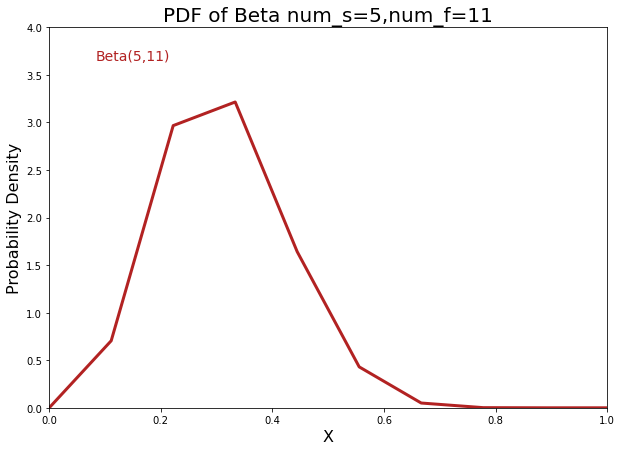

In [13]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

# Bell shape
x = np.linspace(0, 1, 10)
y1 = beta.pdf(x, num_s, num_f)
# y2 = beta.pdf(x, 5, 5)
# y3 = beta.pdf(x, 8, 2)

plt.title(f"PDF of Beta num_s={num_s},num_f={num_f}", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate(f"Beta({num_s},{num_f})", xy=(0.15, 3.7), size = 14, ha='center', va='center', color='firebrick')
# plt.plot(x, y2, linewidth=3, color='burlywood')
# plt.annotate("Beta(5,5)", xy=(0.5, 2.6), size = 14, ha='center', va='center', color='burlywood')
# plt.plot(x, y3, linewidth=3, color='dodgerblue')
# plt.annotate("Beta(8,2)", xy=(0.85, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

# # Straight lines
# x = np.linspace(0, 1, 10000)
# y1 = beta.pdf(x, 1, 2)
# y2 = beta.pdf(x, 1, 1)
# y3 = beta.pdf(x, 2, 1)

# plt.title("PDF of Beta (Straight lines)", fontsize=20)
# plt.xlabel("X", fontsize=16)
# plt.ylabel("Probability Density", fontsize=16)
# plt.plot(x, y1, linewidth=3, color='firebrick')
# plt.annotate("Beta(1,2)", xy=(0.88, 0.45), size = 14, ha='center', va='center', color='firebrick')
# plt.plot(x, y2, linewidth=3, color='burlywood')
# plt.annotate("Beta(1,1)", xy=(0.88, 1.15), size = 14, ha='center', va='center', color='burlywood')
# plt.plot(x, y3, linewidth=3, color='dodgerblue')
# plt.annotate("Beta(2,1)", xy=(0.88, 2.0), size = 14, ha='center', va='center', color='dodgerblue')
# plt.ylim([0, 4])
# plt.xlim([0, 1])
# plt.show()

# # U-shape
# x = np.linspace(0, 1, 10000)
# y1 = beta.pdf(x, 0.2, 0.8)
# y2 = beta.pdf(x, 0.5, 0.5)
# y3 = beta.pdf(x, 0.8, 0.2)

# plt.title("PDF of Beta (U-shape)", fontsize=20)
# plt.xlabel("X", fontsize=16)
# plt.ylabel("Probability Density", fontsize=16)
# plt.plot(x, y1, linewidth=3, color='firebrick')
# plt.annotate("Beta(0.2,0.8)", xy=(0.85, 0.45), size = 14, ha='center', va='center', color='firebrick')
# plt.plot(x, y2, linewidth=3, color='burlywood')
# plt.annotate("Beta(0.5,0.5)", xy=(0.5, 0.88), size = 14, ha='center', va='center', color='burlywood')
# plt.plot(x, y3, linewidth=3, color='dodgerblue')
# plt.annotate("Beta(0.8,0.2)", xy=(0.15, 0.45), size = 14, ha='center', va='center', color='dodgerblue')
# plt.ylim([0, 4])
# plt.xlim([0, 1])
# plt.show()